In [2]:
from pathlib import Path
import yaml
import pickle

model_path = Path("../out/imitative_agent/dynamic_GAN_lstm")

basenames = ['5be1ceef095cb9bd89a31737db05122c-0',
             '7f530cfb150395f6805aa23606574064-0',
             'a73364ffc8c1748f2742258116124063-0',
             'ab913bf6a10c84426742b8984760414c-0',
             'f1a3ad9e51ee94b078b7a274e5282c13-0']

losses = {'discrimination_accuracy': {}, 'inverse_model': {}, 'direct_model': {}, 'inverse_model_repetition': {}}
min_nb_epochs = 1000
for basename in basenames: 
    agent_path = model_path / basename
    config_path = agent_path / 'config.yaml'
    with open(config_path, 'r') as config_file:
        config = yaml.safe_load(config_file)
    with open("%s/metrics.pickle" % agent_path, "rb") as f:
        metrics = pickle.load(f)
    discriminator_loss_weight = config['training']['discriminator_loss_weight']
    jerk_loss_weight = config['training']['jerk_loss_weight']
    print(f'{jerk_loss_weight}_{discriminator_loss_weight}')
    losses['discrimination_accuracy'][f'{jerk_loss_weight}_{discriminator_loss_weight}'] = metrics['validation']['discrimination_accuracy']
    losses['inverse_model'][f'{jerk_loss_weight}_{discriminator_loss_weight}'] = metrics['validation']['inverse_model_estimation_error']
    losses['direct_model'][f'{jerk_loss_weight}_{discriminator_loss_weight}'] = metrics['validation']['direct_model_estimation_error']
    losses['inverse_model_repetition'][f'{jerk_loss_weight}_{discriminator_loss_weight}'] = metrics['validation']['inverse_model_repetition_error']

    nb_epochs = len(metrics['validation']['discrimination_accuracy'])
    if min_nb_epochs > nb_epochs:
        min_nb_epochs = nb_epochs

WEIGHTS = ['0_0', '0_0.01', '0_0.1', '0_1']

0_10
0_0
0_0.1
0_1
0_0.01


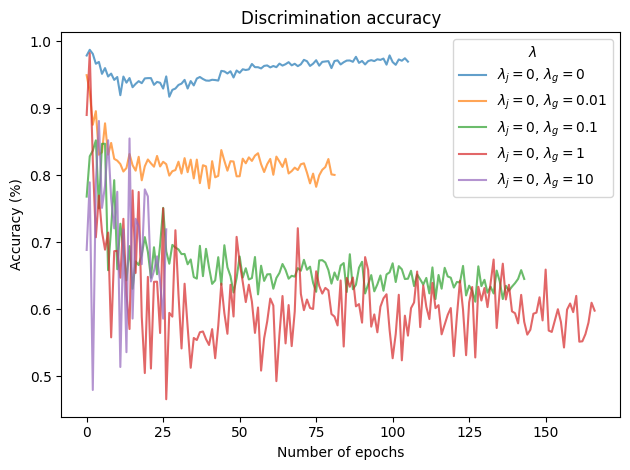

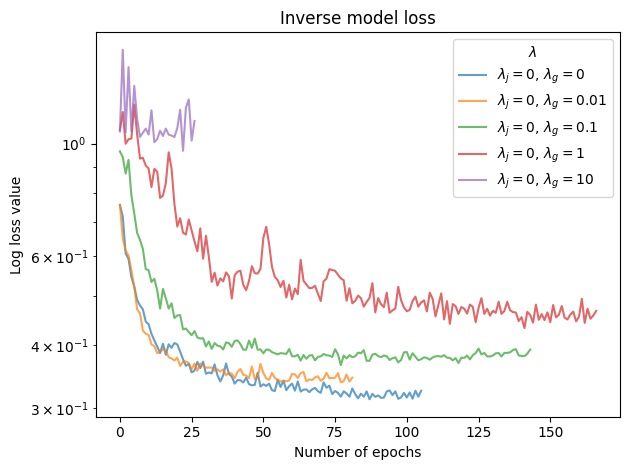

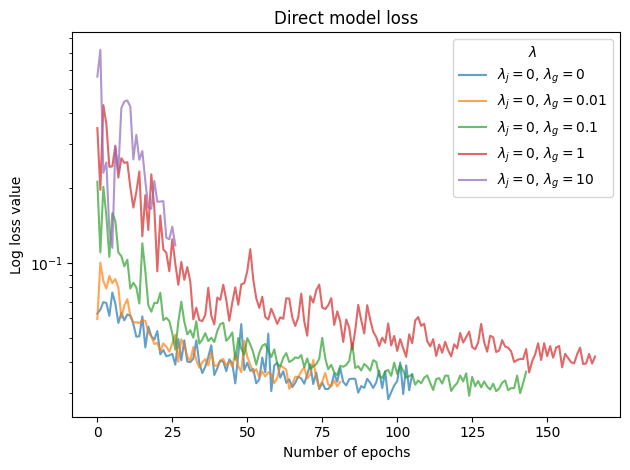

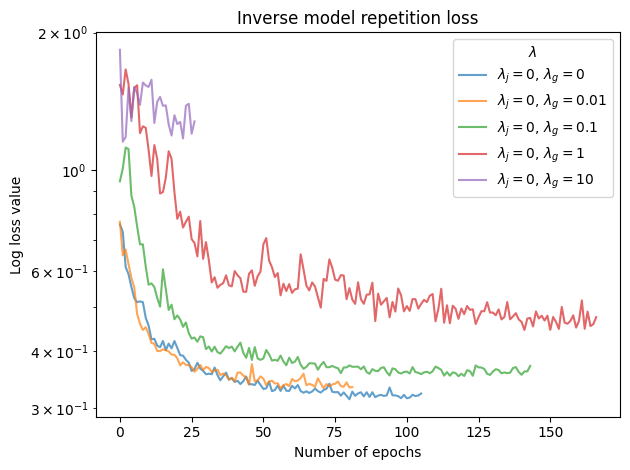

In [3]:
import matplotlib.pyplot as plt
for weight in WEIGHTS:
    jerk_loss_weight = weight.split('_')[0]
    discrimination_loss_weight = weight.split('_')[1]
    label = f'$\lambda_j = {jerk_loss_weight}$, $\lambda_g = {discrimination_loss_weight}$'
    plt.plot(losses['discrimination_accuracy'][weight], label=label, alpha=.7)
plt.legend(title='$\lambda$')
plt.xlabel("Number of epochs")
plt.ylabel("Accuracy (%)")
plt.title("Discrimination accuracy")
plt.tight_layout()
plt.show()

for weight in WEIGHTS:
    jerk_loss_weight = weight.split('_')[0]
    discrimination_loss_weight = weight.split('_')[1]
    label = f'$\lambda_j = {jerk_loss_weight}$, $\lambda_g = {discrimination_loss_weight}$'
    plt.plot(losses['inverse_model'][weight], label=label, alpha=.7)
plt.legend(title='$\lambda$')
plt.xlabel("Number of epochs")
plt.ylabel("Log loss value")
plt.title("Inverse model loss")
plt.yscale("log")
plt.tight_layout()
plt.show()

for weight in WEIGHTS:
    jerk_loss_weight = weight.split('_')[0]
    discrimination_loss_weight = weight.split('_')[1]
    label = f'$\lambda_j = {jerk_loss_weight}$, $\lambda_g = {discrimination_loss_weight}$'
    plt.plot(losses['direct_model'][weight], label=label, alpha=.7)
plt.legend(title='$\lambda$')
plt.xlabel("Number of epochs")
plt.ylabel("Log loss value")
plt.yscale("log")
plt.title("Direct model loss")
plt.tight_layout()
plt.show()

for weight in WEIGHTS:
    jerk_loss_weight = weight.split('_')[0]
    discrimination_loss_weight = weight.split('_')[1]
    label = f'$\lambda_j = {jerk_loss_weight}$, $\lambda_g = {discrimination_loss_weight}$'
    plt.plot(losses['inverse_model_repetition'][weight], label=label, alpha=.7)
plt.legend(title='$\lambda$')
plt.xlabel("Number of epochs")
plt.ylabel("Log loss value")
plt.yscale("log")
plt.title("Inverse model repetition loss")
plt.tight_layout()
plt.show()